In [184]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
# %matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (24,8)

In [185]:
df = pd.read_csv('course_project_train.csv')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [187]:
for c in df.columns:
    n_vals = df[c].unique().size
    print(f"{c:<30}   {str(df[c].dtype):<10}  {n_vals:<5} {'to_cat_candidate' if n_vals<20 else 'number'}")

Home Ownership                   object      4     to_cat_candidate
Annual Income                    float64     5479  number
Years in current job             object      12    to_cat_candidate
Tax Liens                        float64     8     to_cat_candidate
Number of Open Accounts          float64     39    number
Years of Credit History          float64     408   number
Maximum Open Credit              float64     6963  number
Number of Credit Problems        float64     8     to_cat_candidate
Months since last delinquent     float64     90    number
Bankruptcies                     float64     6     to_cat_candidate
Purpose                          object      15    to_cat_candidate
Term                             object      2     to_cat_candidate
Current Loan Amount              float64     5386  number
Current Credit Balance           float64     6592  number
Monthly Debt                     float64     6716  number
Credit Score                     float64     269   number
Cr

In [188]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [189]:
'''                                                                    
Home Ownership                   object      4     to_cat_candidate    cat
Annual Income                    float64     5479  number              number-------------5943 non-null
Years in current job             object      12    to_cat_candidate    try факторизацию---7129 non-null
Tax Liens                        float64     8     to_cat_candidate    number
Number of Open Accounts          float64     39    number              number
Years of Credit History          float64     408   number              number
Maximum Open Credit              float64     6963  number              number
Number of Credit Problems        float64     8     to_cat_candidate    number
Months since last delinquent     float64     90    number              number-------------3419 non-null
Bankruptcies                     float64     6     to_cat_candidate    number-------------7486 non-null    
Purpose                          object      15    to_cat_candidate    cat    
Term                             object      2     to_cat_candidate    bin
Current Loan Amount              float64     5386  number              number
Current Credit Balance           float64     6592  number              number
Monthly Debt                     float64     6716  number              number
Credit Score                     float64     269   number              number------------5943 non-null
Credit Default                   int64       2                ******
'''
print()

In [190]:
df['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [191]:
(df['Annual Income'].isnull() & df['Credit Score'].isnull()).astype('int').sum()


1557

In [192]:
# df['Credit Score_0'] = df['Credit Score'].fillna(0) не будем
#BASE_FEATURE_NAMES.remove('Credit Score_0')

In [193]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()

## Распределения числовых переменных

### 'Annual Income'

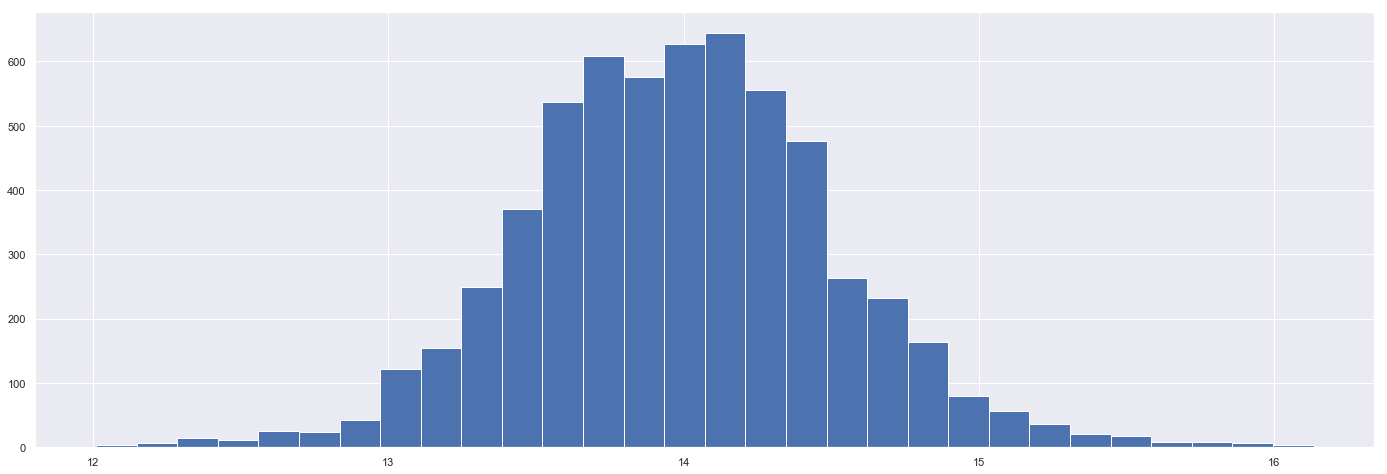

In [194]:
df['Annual Income'].apply(np.log).hist(bins=30)
plt.show()

### 'Number of Open Accounts'

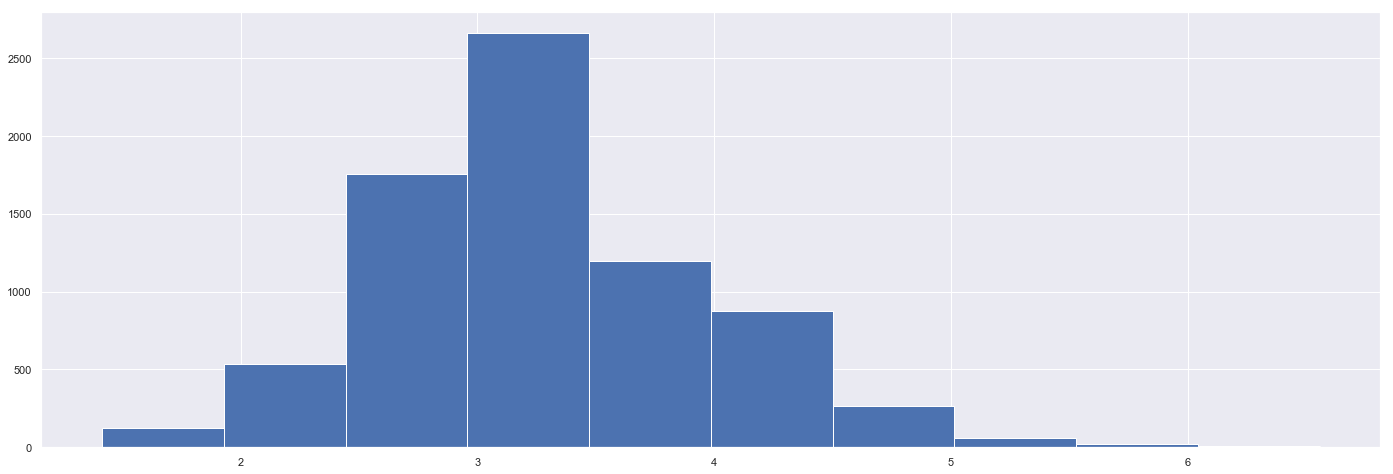

In [195]:
df['Number of Open Accounts'].apply(np.sqrt).hist()
plt.show()

### 'Years of Credit History'

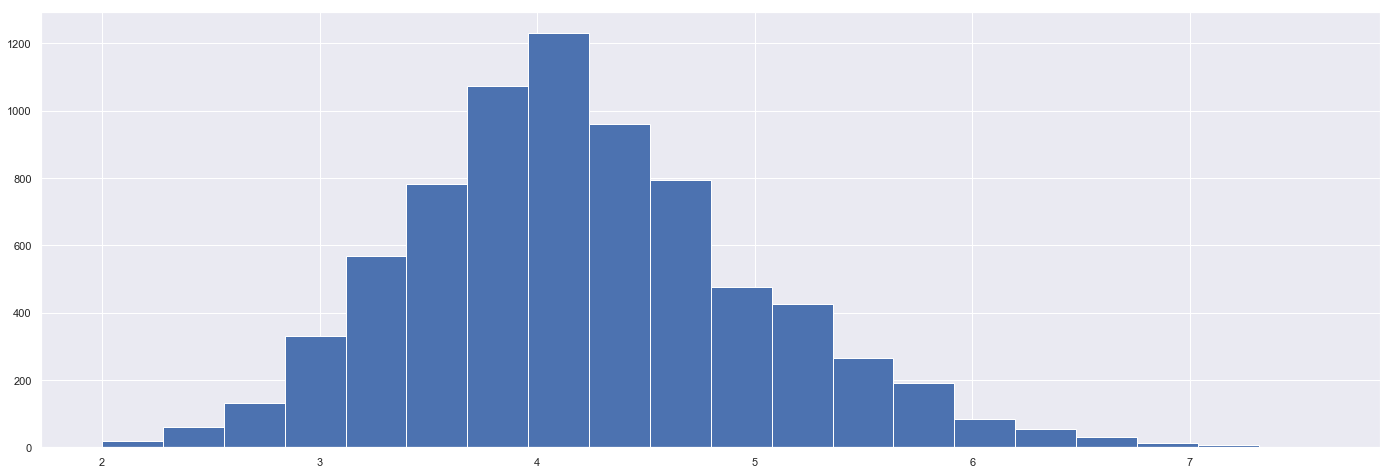

In [196]:
df['Years of Credit History'].apply(np.sqrt).hist(bins=20)
plt.show()

### 'Maximum Open Credit'

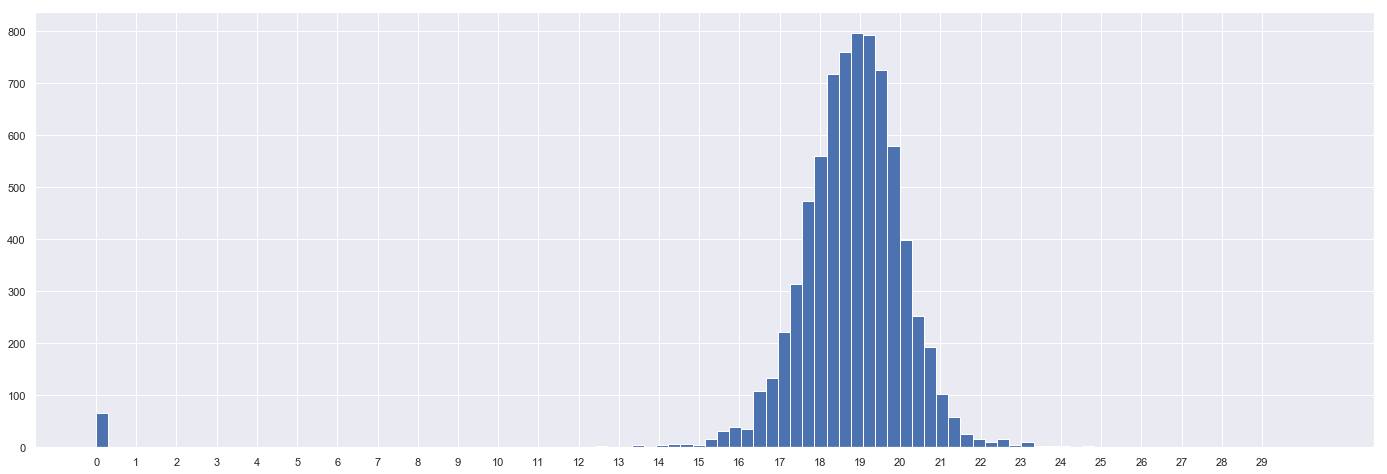

In [197]:
pl = (df['Maximum Open Credit']+1).apply(np.log2).hist(bins=100)
pl.set_xticks(range(30))
plt.show()

In [198]:
# выбросами являются значения 0 и >10M
df.loc[df['Maximum Open Credit'] == 0, 'Maximum Open Credit'].shape,\
df.loc[df['Maximum Open Credit'] > 2**23, 'Maximum Open Credit'].shape

((65,), (27,))

In [199]:
med = df['Maximum Open Credit'].median()

In [200]:
# заменим верхний выброс медианой

df.loc[df['Maximum Open Credit'] > 2**23, 'Maximum Open Credit'] = med

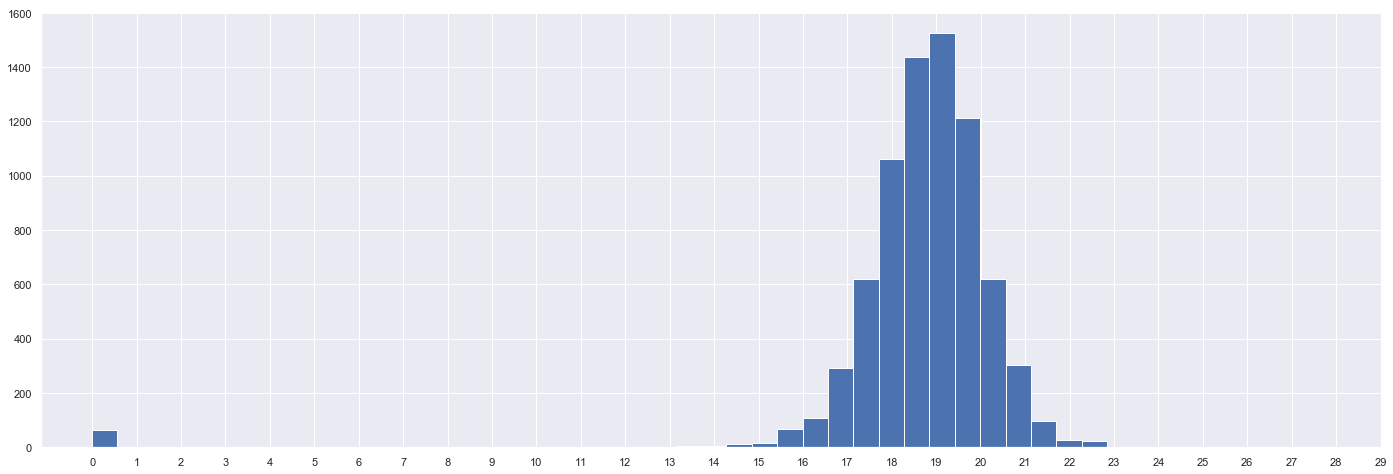

In [201]:
pl = (df['Maximum Open Credit']+1).apply(np.log2).hist(bins=40)
pl.set_xticks(range(30))
plt.show()

In [205]:
df.loc[df['Maximum Open Credit']==0, TARGET_NAME].mean(), df.loc[df['Maximum Open Credit']!=0, TARGET_NAME].mean()

(0.15384615384615385, 0.28285137861466036)

In [209]:
# Нижний выброс оказывает существенное влияние на целевую переменную, введем дополнительную переменную, а 0 заменим на null
df['Nomore_credits'] = np.where(df['Maximum Open Credit']==0, 1, 0)

df['Maximum Open Credit'] = np.where(df['Maximum Open Credit']==0, np.nan, df['Maximum Open Credit'])

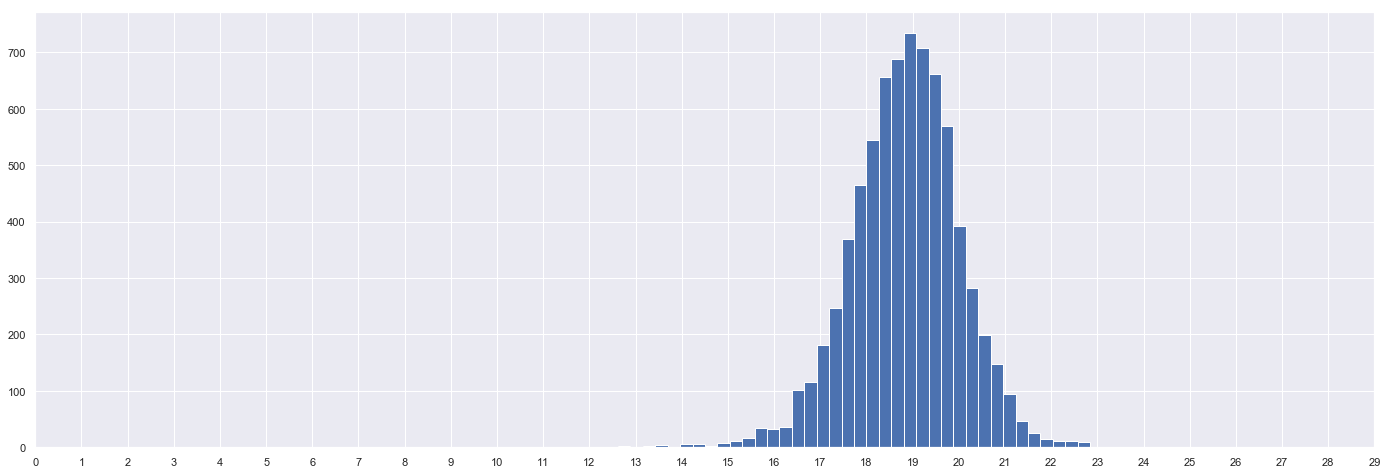

In [210]:
pl = (df['Maximum Open Credit']+1).apply(np.log2).hist(bins=40)
pl.set_xticks(range(30))
plt.show()

In [211]:
BASE_FEATURE_NAMES.append('Nomore_credits')

### 'Current Loan Amount'

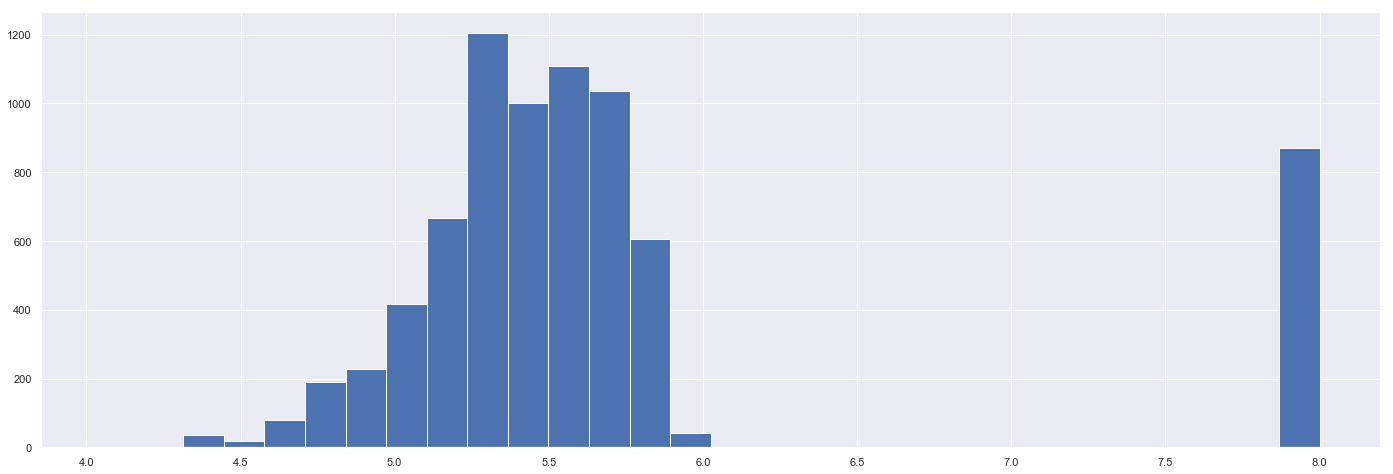

In [203]:
df['Current Loan Amount'].apply(np.log10).hist(bins=30)

### 'Current Credit Balance'

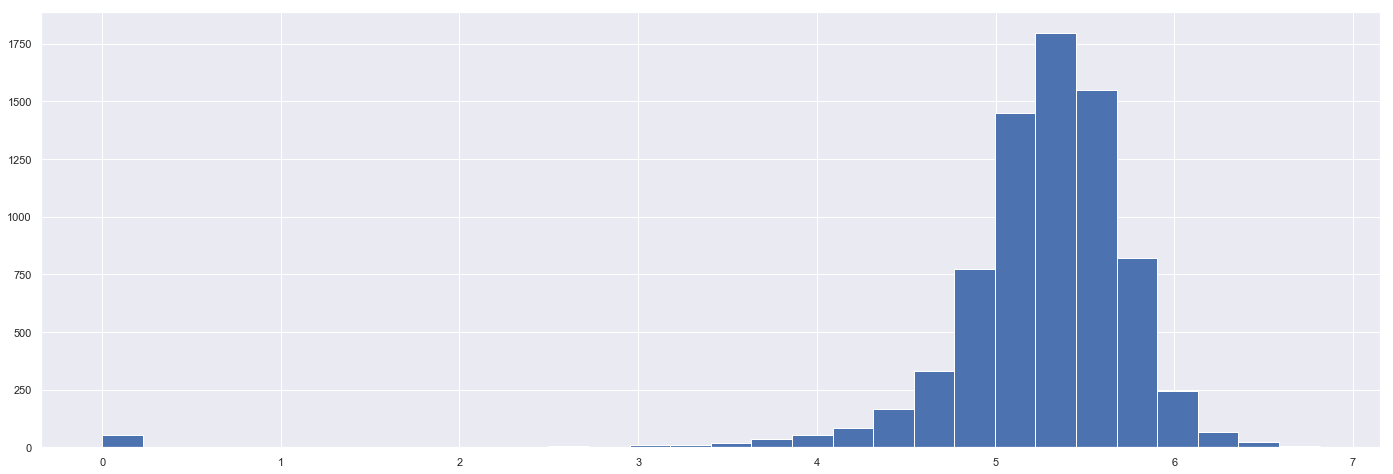

In [216]:
(df['Current Credit Balance'] + 1).apply(np.log10).hist(bins=30)
plt.show()

### 'Monthly Debt'

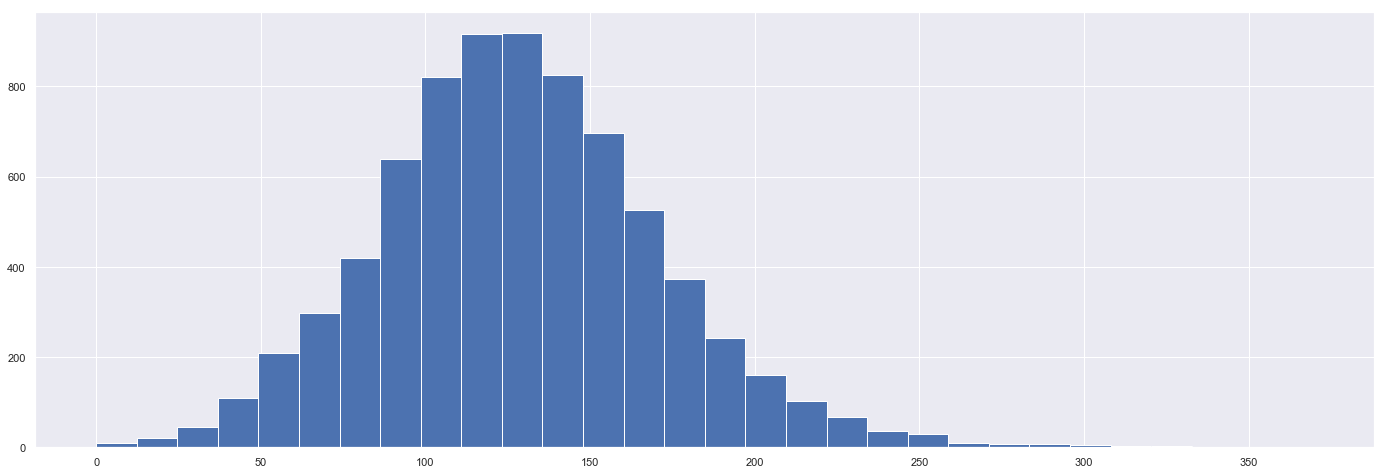

In [218]:
(df['Monthly Debt']).apply(np.sqrt).hist(bins=30)
plt.show()

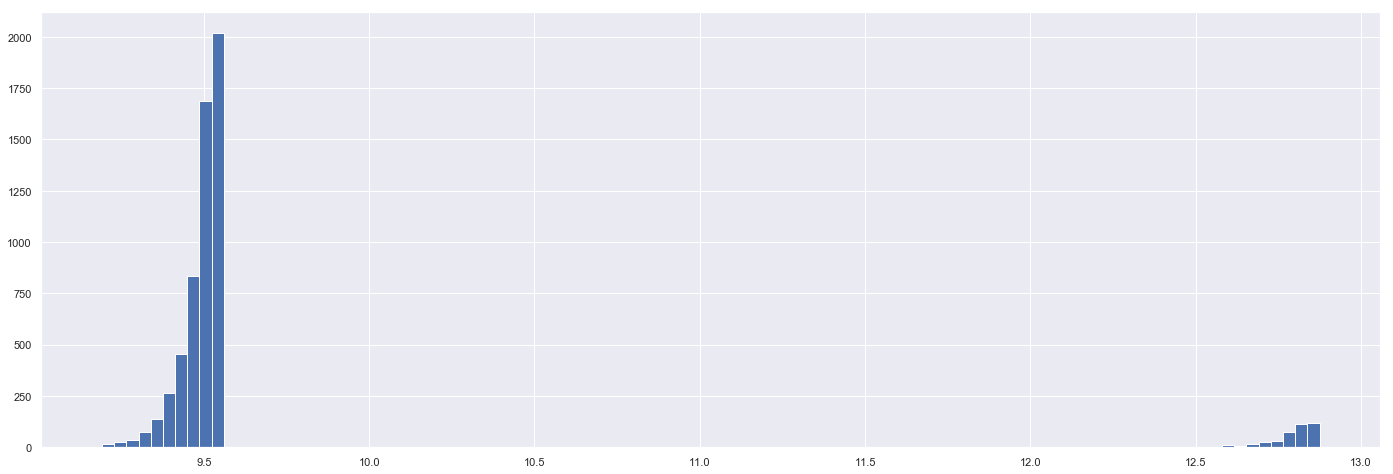

In [231]:
(df['Credit Score']).apply(np.log2).hist(bins=100)
plt.show()

In [234]:
(df['Credit Score']<2000).astype('int').sum(), (df['Credit Score']>=2000).astype('int').sum()

(5543, 400)

In [233]:
df.loc[df['Credit Score']<2000, TARGET_NAME].mean(), df.loc[df['Credit Score']>=2000, TARGET_NAME].mean()

(0.21360274219736605, 1.0)

In [235]:
df['High_Score'] = np.where(df['Credit Score']>=2000, 1, 0)

df['Credit Score'] = np.where(df['Credit Score']>=2000, np.nan, df['Credit Score'])

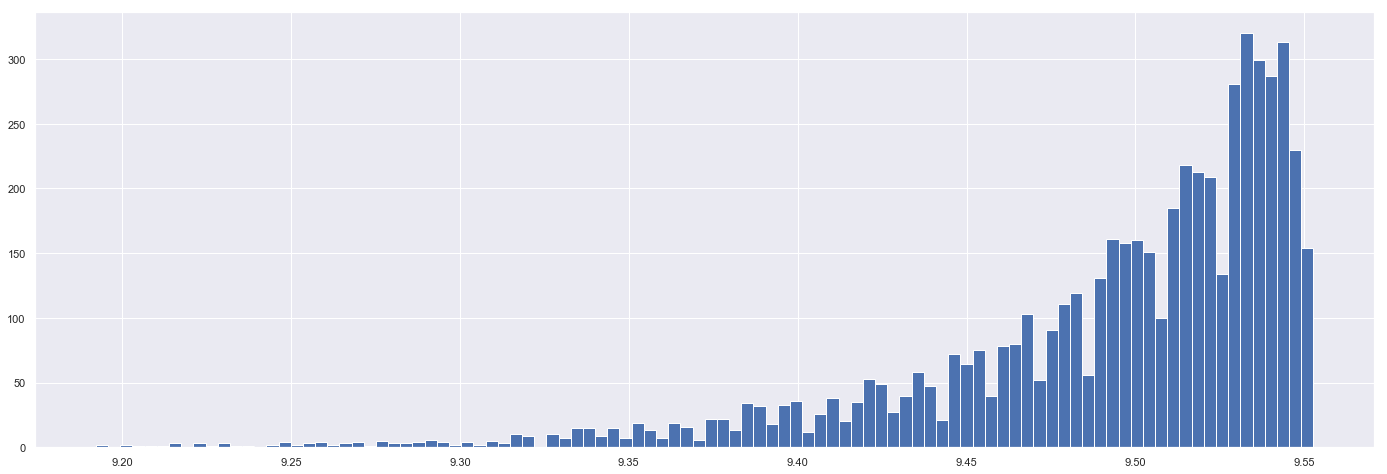

In [236]:
(df['Credit Score']).apply(np.log2).hist(bins=100)
plt.show()

## 'Years in current job' - лабелизация

In [ ]:
y = df['Years in current job'].value_counts().index
x = list(df['Years in current job'].value_counts())

plt.figure(figsize=(10, 8))

sns.barplot(x=x, y=y)

plt.title('Years in current job')
plt.show()

In [ ]:
Years_in_cj_dict = {'10+ years':10, '2 years':2, '3 years':3, '< 1 year':0, '5 years':5, '1 year':1,
       '4 years':4, '6 years':6, '7 years':7, '8 years':8, '9 years':9}

In [ ]:
df['int Years in current job'] = df['Years in current job'].map(Years_in_cj_dict)
df.head()

In [ ]:
BASE_FEATURE_NAMES.append('int Years in current job')

## Влияние числовых переменных на цель

In [ ]:
df[TARGET_NAME].value_counts()

In [ ]:
corr_with_target = df[df['Current Loan Amount'] != 99999999][BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable без выброса')
plt.show()

In [ ]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable с выбросом')
plt.show()

In [ ]:
BASE_FEATURE_NAMES.remove('Months since last delinquent') # удаляем 

In [ ]:
BASE_FEATURE_NAMES.remove('Bankruptcies') # удаляем

In [ ]:
BASE_FEATURE_NAMES

## Корреляции независимых переменных

In [ ]:
plt.figure(figsize = (15,12))

sns.set(font_scale=1)
sns.heatmap(df[df['Current Loan Amount'] != 99999999][BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [ ]:
plt.figure(figsize = (15,12))

sns.set(font_scale=1)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [ ]:
pd.qcut(df['Current Loan Amount'], 5, duplicates='drop').unique()

In [ ]:
pd.cut(df['Current Loan Amount'], 5, duplicates='drop').unique()

In [ ]:
df[df['Current Loan Amount'] != 99999999].describe()

In [ ]:
df.describe()